In [1]:
!date

Wed Jan 18 00:23:03 PST 2023


In [2]:
!echo $CONDA_PREFIX

/c4/home/derek/miniconda3/envs/pygenometracks


In [3]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
from pygenometracks import tracks

import scanpy as sc

In [4]:
GTF_input='/c4/home/derek/data1/HDD-2/derek/reference/human_hp3_reference/genes/genes.gtf'

GTF = pd.read_csv(GTF_input,sep='\t',comment='#',header=None,names=['seqname', 'source', 'feature', 'start' , 'end', 'score', 'strand', 'frame', 'attribute'])


coord_dict = {}

for index, line in GTF.iterrows():
    if line['feature'] == 'gene':

        attribute_list = line['attribute'].split(';')
    
        gene_name = [i for i in attribute_list if i.startswith(' gene_name')][0].split('"')[1]
    
        coordinate = str(line['seqname'])+':'+str(line['start'])+'-'+str(line['end'])
    
        coord_dict[gene_name] = coordinate
    else:
        pass

In [5]:
# %%bash
# working_dir=/media/chang/HDD-4/derek/SLR/data/20210707/sinto_outs/

# ##get bed file of exons
# exon_bedfile=/home/derek/analysis_4/SLR/resources/exons.bed


# ##only output alignments overlapping the exon bedfile 
# samtools view -bh -L $exon_bedfile $working_dir/OPC.bam> $working_dir/OPC.exons.bam ; samtools index $working_dir/OPC.exons.bam

In [6]:
# %%bash
# generate bigwig files of

# working_dir=./T4_Mem_outs/

# bamCoverage\
#     --bam $working_dir/T4_Mem.bam \
#     --outFileName $working_dir/T4_Mem_CD45.bw \
#     --ignoreDuplicates \
#     --binSize 1 \
#     --region chr1:198638457:198757476


In [7]:
##create pyGenomeTracks configuration file

In [9]:
pwd

'/nowakowskilab/data1/derek/scSLR/notebooks/fig1'

In [10]:
sns.color_palette("bright")

[(0.00784313725490196, 0.24313725490196078, 1.0),
 (1.0, 0.48627450980392156, 0.0),
 (0.10196078431372549, 0.788235294117647, 0.2196078431372549),
 (0.9098039215686274, 0.0, 0.043137254901960784),
 (0.5450980392156862, 0.16862745098039217, 0.8862745098039215),
 (0.6235294117647059, 0.2823529411764706, 0.0),
 (0.9450980392156862, 0.2980392156862745, 0.7568627450980392),
 (0.6392156862745098, 0.6392156862745098, 0.6392156862745098),
 (1.0, 0.7686274509803922, 0.0),
 (0.0, 0.8431372549019608, 1.0)]

In [16]:
sns.color_palette("bright")[3]

(0.9098039215686274, 0.0, 0.043137254901960784)

In [23]:
%%writefile bigwig_initial_test.ini



[spacer]
height = 0.1

[bigwig file test]
file = /c4/home/derek/data1/HDD-2/derek/SLR_temp/CAT_20220904_PBMC/sample_1/merged/UMItools_outs/merged_complete_internal_dedup.bw
color = (0.00784313725490196, 0.24313725490196078, 1.0) 
# height of the track in cm (optional value)
height = 7
#title = internal
min_value = 0
max_value = 2000
alpha = .75
#type = line:5

# [spacer]
# height = 1

[bigwig file test]
file = /c4/home/derek/data1/HDD-2/derek/SLR_temp/CAT_20220904_PBMC/sample_1/merged/UMItools_5prime_outs/merged_complete_5prime_dedup.bw
color = (0.9098039215686274, 0.0, 0.043137254901960784)
# height of the track in cm (optional value)
height = 7
#title = 5prime
# min_value = 0
# max_value = 5000
alpha = .75
overlay_previous = share-y
#type = line:5



[spacer]
height = 0.5

[genes]
color = black  
file = /c4/home/derek/data1/HDD-2/derek/reference/refdata-gex-GRCh38-2020-A/genes/genes.gtf
height = 2
# title = gtf
fontsize = 8
file_type = gtf
gene_rows = 5

[x-axis]
fontsize=10


Overwriting bigwig_initial_test.ini


In [5]:
coord_dict['PTPRC']

'chr1:198638457-198757476'

In [6]:
%%bash
pyGenomeTracks --tracks bigwig_initial_test.ini --region 'chr12:6534512-6538374' -o bigwig_GAPDH.png   



INFO:pygenometracks.tracksClass:initialize 1. [spacer]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig file test]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig file test]
INFO:pygenometracks.tracksClass:initialize 4. [spacer]
INFO:pygenometracks.tracksClass:initialize 5. [genes]
100%|██████████| 166/166 [00:00<00:00, 362.55it/s]
INFO:pygenometracks.tracksClass:initialize 6. [x-axis]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:8.507871389389038
DEBUG:pygenometracks.tracksClass:Figure size in cm is 40 x 12.207446808510639. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [spacer]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig file test]
INFO:pygenometracks.tracksClass:plotting 3. [bigwig file test]
INFO:pygenometracks.tracksClass:plotting 4. [spacer]
INFO:pygenometracks.tracksClass:plotting 5. [genes]
DEBUG:pygenometracks.tracks.GenomeTrack:ylim 7.9799999999999995,-0.08
INFO:pygenometracks.tracksClass:plott

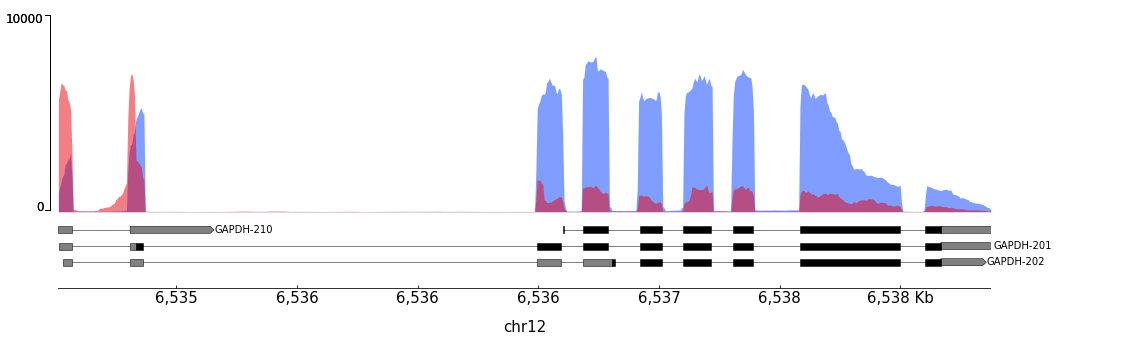

In [15]:
from IPython.display import Image
Image(filename='bigwig_GAPDH.png',)

In [24]:
%%bash
pyGenomeTracks --tracks bigwig_initial_test.ini --region 'chr1:198638457-198725000' -o bigwig_PTPRC.png   



INFO:pygenometracks.tracksClass:initialize 1. [spacer]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig file test]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig file test]
INFO:pygenometracks.tracksClass:initialize 4. [spacer]
INFO:pygenometracks.tracksClass:initialize 5. [genes]
100%|██████████| 26/26 [00:00<00:00, 244.99it/s]
INFO:pygenometracks.tracksClass:initialize 6. [x-axis]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:7.026492118835449
DEBUG:pygenometracks.tracksClass:Figure size in cm is 40 x 11.542553191489361. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [spacer]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig file test]
INFO:pygenometracks.tracksClass:plotting 3. [bigwig file test]
INFO:pygenometracks.tracksClass:plotting 4. [spacer]
INFO:pygenometracks.tracksClass:plotting 5. [genes]
DEBUG:pygenometracks.tracks.GenomeTrack:ylim 12.58,-0.08
INFO:pygenometracks.tracksClass:plotting 6. [x-axis]

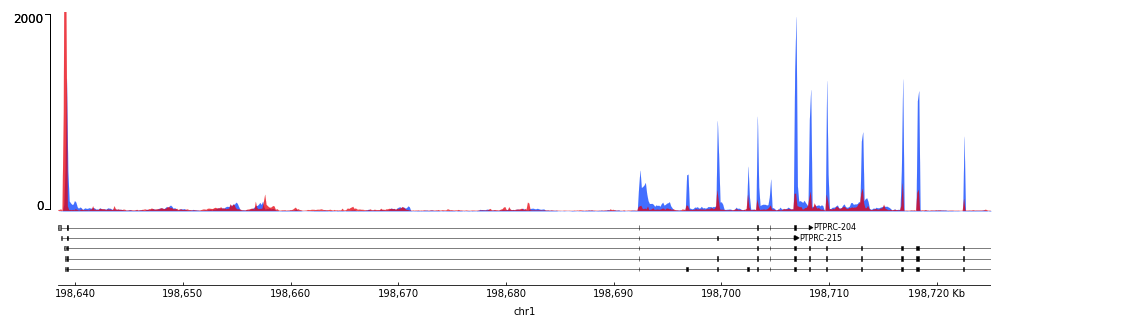

In [25]:
from IPython.display import Image
Image(filename='bigwig_PTPRC.png',)

In [27]:
%%bash
pyGenomeTracks --tracks bigwig_initial_test.ini --region 'chr1:198638457-198725000' -o bigwig_PTPRC.pdf  



INFO:pygenometracks.tracksClass:initialize 1. [spacer]
INFO:pygenometracks.tracksClass:initialize 2. [bigwig file test]
INFO:pygenometracks.tracksClass:initialize 3. [bigwig file test]
INFO:pygenometracks.tracksClass:initialize 4. [spacer]
INFO:pygenometracks.tracksClass:initialize 5. [genes]
100%|██████████| 26/26 [00:00<00:00, 224.16it/s]
INFO:pygenometracks.tracksClass:initialize 6. [x-axis]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:6.482441186904907
DEBUG:pygenometracks.tracksClass:Figure size in cm is 40 x 11.542553191489361. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [spacer]
INFO:pygenometracks.tracksClass:plotting 2. [bigwig file test]
INFO:pygenometracks.tracksClass:plotting 3. [bigwig file test]
INFO:pygenometracks.tracksClass:plotting 4. [spacer]
INFO:pygenometracks.tracksClass:plotting 5. [genes]
DEBUG:pygenometracks.tracks.GenomeTrack:ylim 12.58,-0.08
INFO:pygenometracks.tracksClass:plotting 6. [x-axis]

In [72]:
!conda list

# packages in environment at /c4/home/derek/miniconda3/envs/pygenometracks:
#
# Name                    Version                   Build  Channel
_libgcc_mutex             0.1                 conda_forge    conda-forge
_openmp_mutex             4.5                  2_kmp_llvm    conda-forge
anndata                   0.8.0                    pypi_0    pypi
anyio                     3.5.0            py39h06a4308_0  
argcomplete               1.12.3             pyhd3eb1b0_0  
argh                      0.26.2           py39h06a4308_0  
argon2-cffi               21.3.0             pyhd3eb1b0_0  
argon2-cffi-bindings      21.2.0           py39h7f8727e_0  
asciitree                 0.3.3                      py_2  
asttokens                 2.0.5              pyhd3eb1b0_0  
attrs                     22.1.0           py39h06a4308_0  
babel                     2.11.0           py39h06a4308_0  
backcall                  0.2.0              pyhd3eb1b0_0  
beautifulsoup4            4.11.1           